d:\Andrushak\mymymy\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Найкращі гіперпараметри знайдені за допомогою перехресної перевірки:
{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Найкраще значення метрики на тренувальній вибірці: 0.7762964062964063
Точність глибокої нейронної мережі на валідаційній вибірці з найкращими гіперпараметрами: 0.7715827338129496


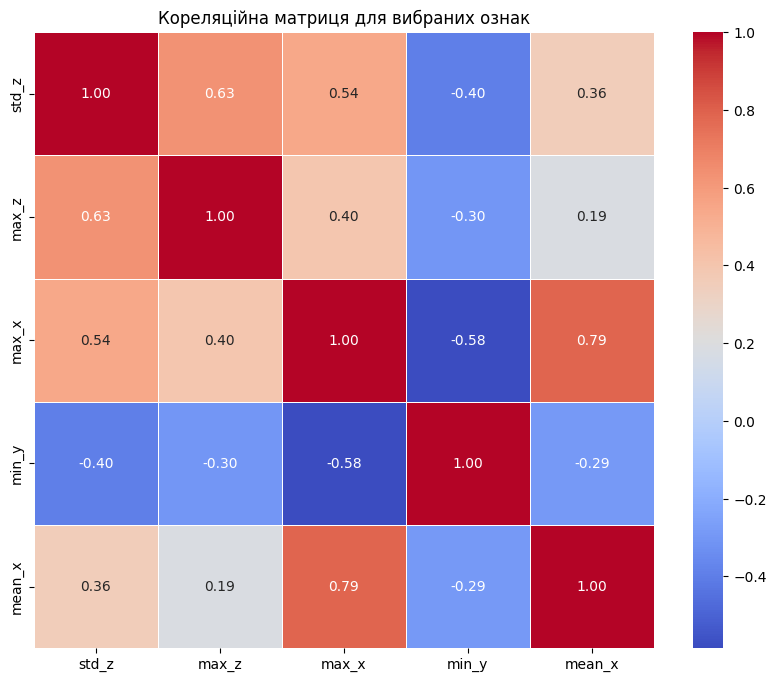

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Завантаження даних та підготовка до глибокого навчання (використовуємо підготовлений df_stats)
# Предполагаем, что df_stats содержит подготовленные данные для глубокого обучения

# Підготовка даних для глибокого навчання
X = df_stats.drop(columns=['activity', 'sensor'])  # Ознаки (всі крім цільової змінної)
y = df_stats['activity']                          # Цільова змінна

# Поділ датасету на тренувальну і валідаційну вибірку (70/30%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Нормалізація даних (значення від 0 до 1)
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_val_normalized = scaler.transform(X_val)

# Тренування глибокої нейронної мережі (Multi-Layer Perceptron)
mlp_model = MLPClassifier(random_state=42)

# Задаємо сітку гіперпараметрів, які хочемо налаштувати
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50), (100, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

# Здійснюємо пошук найкращих гіперпараметрів з використанням перехресної перевірки
grid_search = GridSearchCV(mlp_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_normalized, y_train)

# Виводимо найкращі гіперпараметри та значення метрики для них
print("Найкращі гіперпараметри знайдені за допомогою перехресної перевірки:")
print(grid_search.best_params_)
print("Найкраще значення метрики на тренувальній вибірці:", grid_search.best_score_)

# Оцінка результату на валідаційній вибірці з найкращими гіперпараметрами
best_model = grid_search.best_estimator_
y_pred_val_best = best_model.predict(X_val_normalized)
accuracy_val_best = accuracy_score(y_val, y_pred_val_best)
print(f'Точність глибокої нейронної мережі на валідаційній вибірці з найкращими гіперпараметрами: {accuracy_val_best}')

# Перетворення категоріальних змінних в числовий формат перед обчисленням кореляційної матриці
label_encoder = LabelEncoder()
df_stats_encoded = df_stats.apply(label_encoder.fit_transform)

# Обчислення кореляційної матриці для нового датафрейму з закодованими змінними
correlation_matrix = df_stats_encoded.corr()

# Вибір 5 ознак з найбільшою абсолютною кореляцією з цільовою змінною
top_features = correlation_matrix['activity'].abs().nlargest(6).index[1:]  # Виберемо 5 найбільш корельованих ознак

# Оновлення кореляційної матриці для обраної подмножини ознак
top_features_corr = df_stats_encoded[top_features].corr()

# Візуалізація кореляційної матриці для вибраних ознак
plt.figure(figsize=(10, 8))
sns.heatmap(top_features_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Кореляційна матриця для вибраних ознак')
plt.show()
